In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

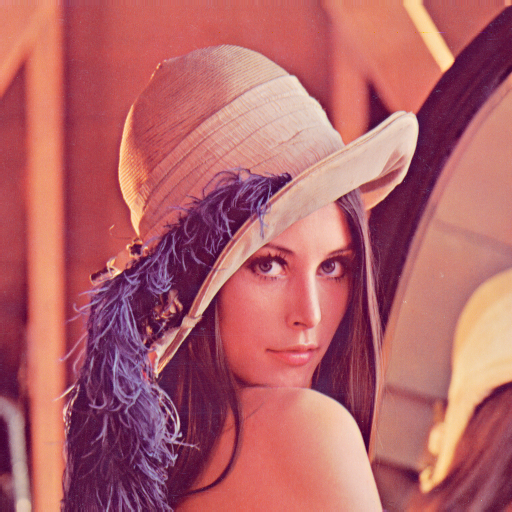

In [2]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')
cv2_imshow(img)

In [ ]:
r,g,b = cv2.split(img)
r = r/255
g = g/255
b = b/255

In [ ]:
hue = []
sat = []
val = []
for i,j,k in zip(r,g,b):
  for x,y,z in zip(i,j,k):
    cmax = max(x,y,z)
    cmin = min(x,y,z)
    df = cmax-cmin
    if cmax == x:
      h = (((y-z)/df)%6)*60
    elif cmax == y:
      h = (((z-x)/df)+2)*60
    elif cmax == z:
      h = (((x-y)/df)+4)*60
    elif cmax == cmin:
      h == 0
    if cmax == 0:
      s = 0
    else:
      s = df/cmax
    v = cmax
    hue.append(h)
    sat.append(s)
    val.append(v)

In [ ]:
hue = np.reshape(hue,(512,512))
sat = np.reshape(sat,(512,512))
val = np.reshape(val,(512,512))

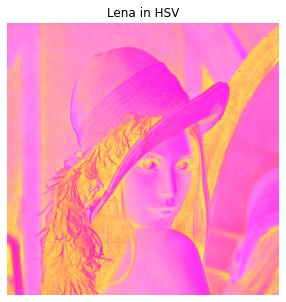

In [ ]:
hsv = cv2.merge((hue,sat,val))
plt.figure(figsize = (10,10))
plt.imshow(hsv),plt.axis('off'),plt.title('Lena in HSV')

In [ ]:
print(hue.min(),hue.max(), sat.min(), sat.max(), val.min(),val.max())

0.0 358.4210526315789 0.01877934272300476 0.9646017699115044 0.23137254901960785 1.0


In [ ]:
h_hsl = hue
l_hsl = v*(1-(sat/2))
s_hsl = (v*sat)/(1-abs(2*l_hsl-1))

In [ ]:
print(h_hsl.min(), s_hsl.min(), l_hsl.min(), h_hsl.max(), s_hsl.max(), l_hsl.max())

0.0 0.02421465968586396 0.37558563248308174 358.4210526315789 0.9316239316239315 0.718678081561263


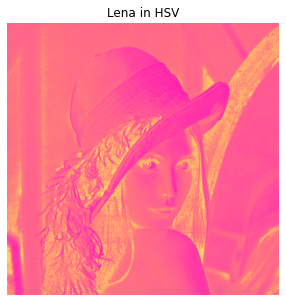

In [ ]:
hsl = cv2.merge((h_hsl,s_hsl,l_hsl))
plt.figure(figsize = (5,5)),plt.axis('off'),plt.title('Lena in HSL')
plt.imshow(hsl)